Machine Learning

In [1]:
#Install the dependencies
import quandl
quandl.ApiConfig.api_key = "eYfhtNa8prf9SAwCHsGR"
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Get the stock data using API

In [2]:
df = quandl.get("WIKI/AMZN")
#quandl api: eYfhtNa8prf9SAwCHsGR


In [3]:
# Take a look at the data
print(df.columns)
df.head()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [4]:
df=df.loc['2012-01-01':'2019-01-01']
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,175.89,179.475,175.550,179.03,5110800.0,0.0,1.0,175.89,179.475,175.550,179.03,5110800.0
2012-01-04,179.21,180.500,176.065,177.51,4205200.0,0.0,1.0,179.21,180.500,176.065,177.51,4205200.0
2012-01-05,175.94,178.250,174.050,177.61,3809100.0,0.0,1.0,175.94,178.250,174.050,177.61,3809100.0
2012-01-06,178.07,184.650,177.500,182.61,7008400.0,0.0,1.0,178.07,184.650,177.500,182.61,7008400.0
2012-01-09,182.76,184.370,177.000,178.56,5056900.0,0.0,1.0,182.76,184.370,177.000,178.56,5056900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1586.45,1590.000,1563.170,1581.86,4667291.0,0.0,1.0,1586.45,1590.000,1563.170,1581.86,4667291.0
2018-03-22,1565.47,1573.850,1542.400,1544.10,6177737.0,0.0,1.0,1565.47,1573.850,1542.400,1544.10,6177737.0
2018-03-23,1539.01,1549.020,1495.360,1495.56,7843966.0,0.0,1.0,1539.01,1549.020,1495.360,1495.56,7843966.0


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03,1566.0,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1.566000e+03
mean,533.855069,538.776586,528.322012,533.848274,3.841182e+06,0.0,1.0,533.855069,538.776586,528.322012,533.848274,3.841182e+06
std,320.251234,322.613529,317.058474,320.050743,2.232362e+06,0.0,0.0,320.251234,322.613529,317.058474,320.050743,2.232362e+06
min,173.810000,178.250000,172.000000,175.930000,9.844000e+05,0.0,1.0,173.810000,178.250000,172.000000,175.930000,9.844000e+05
25%,286.995000,291.417500,285.342675,288.960000,2.555776e+06,0.0,1.0,286.995000,291.417500,285.342675,288.960000,2.555776e+06
50%,384.035000,387.830000,381.546200,384.635000,3.264957e+06,0.0,1.0,384.035000,387.830000,381.546200,384.635000,3.264957e+06
75%,762.642500,766.792500,756.707500,760.475000,4.395242e+06,0.0,1.0,762.642500,766.792500,756.707500,760.475000,4.395242e+06
max,1615.960000,1617.540000,1590.890000,1598.390000,2.385606e+07,0.0,1.0,1615.960000,1617.540000,1590.890000,1598.390000,2.385606e+07


In [6]:
corr_seq = (df.corr()['Open']).sort_values(ascending=False).drop('Open')
corr_seq

Adj. Open      1.000000
Adj. High      0.999862
High           0.999862
Adj. Low       0.999742
Low            0.999742
Adj. Close     0.999637
Close          0.999637
Adj. Volume    0.053888
Volume         0.053888
Ex-Dividend         NaN
Split Ratio         NaN
Name: Open, dtype: float64

In [7]:
df=df.drop(['Ex-Dividend', 'Split Ratio'],1)
print(df)
print(df.shape)

               Open      High       Low    Close     Volume  Adj. Open  \
Date                                                                     
2012-01-03   175.89   179.475   175.550   179.03  5110800.0     175.89   
2012-01-04   179.21   180.500   176.065   177.51  4205200.0     179.21   
2012-01-05   175.94   178.250   174.050   177.61  3809100.0     175.94   
2012-01-06   178.07   184.650   177.500   182.61  7008400.0     178.07   
2012-01-09   182.76   184.370   177.000   178.56  5056900.0     182.76   
...             ...       ...       ...      ...        ...        ...   
2018-03-21  1586.45  1590.000  1563.170  1581.86  4667291.0    1586.45   
2018-03-22  1565.47  1573.850  1542.400  1544.10  6177737.0    1565.47   
2018-03-23  1539.01  1549.020  1495.360  1495.56  7843966.0    1539.01   
2018-03-26  1530.00  1556.990  1499.250  1555.86  5547618.0    1530.00   
2018-03-27  1572.40  1575.960  1482.320  1497.05  6793279.0    1572.40   

            Adj. High  Adj. Low  Adj.

C:\Users\ether\.conda\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


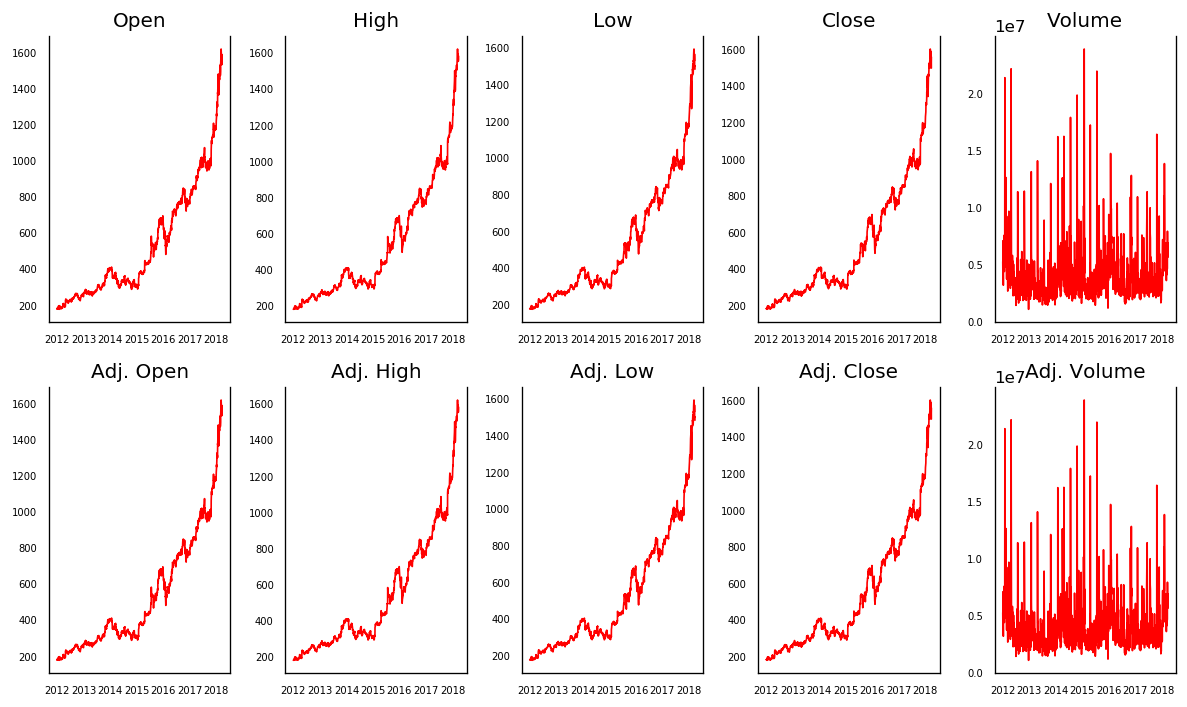

In [8]:
# Show the 
fig, axes = plt.subplots(nrows=2, ncols=5, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Data enginering

In [9]:
#Create another column to store tomorrow's open price shifted 1 units up
df['OpenTomorrow'] = df[['Open']].shift(-1)
df['Open2d'] = df[['Open']].shift(-2)
#print the new data set
print(df)

               Open      High       Low    Close     Volume  Adj. Open  \
Date                                                                     
2012-01-03   175.89   179.475   175.550   179.03  5110800.0     175.89   
2012-01-04   179.21   180.500   176.065   177.51  4205200.0     179.21   
2012-01-05   175.94   178.250   174.050   177.61  3809100.0     175.94   
2012-01-06   178.07   184.650   177.500   182.61  7008400.0     178.07   
2012-01-09   182.76   184.370   177.000   178.56  5056900.0     182.76   
...             ...       ...       ...      ...        ...        ...   
2018-03-21  1586.45  1590.000  1563.170  1581.86  4667291.0    1586.45   
2018-03-22  1565.47  1573.850  1542.400  1544.10  6177737.0    1565.47   
2018-03-23  1539.01  1549.020  1495.360  1495.56  7843966.0    1539.01   
2018-03-26  1530.00  1556.990  1499.250  1555.86  5547618.0    1530.00   
2018-03-27  1572.40  1575.960  1482.320  1497.05  6793279.0    1572.40   

            Adj. High  Adj. Low  Adj.

In [38]:
data = df[['Close','OpenTomorrow','Open2d']][:-1]
data

,Close,OpenTomorrow,Open2d
Date,,,
2012-01-03,179.03,179.21,175.94
2012-01-04,177.51,175.94,178.07
2012-01-05,177.61,178.07,182.76
2012-01-06,182.61,182.76,181.10
2012-01-09,178.56,181.10,179.64
...,...,...,...
2018-03-20,1586.51,1586.45,1565.47
2018-03-21,1581.86,1565.47,1539.01
2018-03-22,1544.10,1539.01,1530.00


In [39]:
# use 30 days' data to predict
forecast_out = 30 #'n=30' days
#Create prediction column, shifted '30' units up
data['Prediction'] = data[['OpenTomorrow']].shift(-forecast_out)
print(data)

              Close  OpenTomorrow   Open2d  Prediction
Date                                                  
2012-01-03   179.03        179.21   175.94      177.79
2012-01-04   177.51        175.94   178.07      180.09
2012-01-05   177.61        178.07   182.76      182.65
2012-01-06   182.61        182.76   181.10      181.95
2012-01-09   178.56        181.10   179.64      178.78
...             ...           ...      ...         ...
2018-03-20  1586.51       1586.45  1565.47         NaN
2018-03-21  1581.86       1565.47  1539.01         NaN
2018-03-22  1544.10       1539.01  1530.00         NaN
2018-03-23  1495.56       1530.00  1572.40         NaN
2018-03-26  1555.86       1572.40      NaN         NaN

[1565 rows x 4 columns]


In [40]:
N = data.shape[0] # total num days
N

1565

In [41]:
# Create the independent data set (X)
# Convert the dataframe to a numpy array
X = np.array(data.drop(['OpenTomorrow','Prediction','Close'],1))
print(X)
#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 175.94]
 [ 178.07]
 [ 182.76]
 ...
 [1530.  ]
 [1572.4 ]
 [    nan]]
[[ 175.94]
 [ 178.07]
 [ 182.76]
 ...
 [1373.49]
 [1364.67]
 [1385.93]]


In [42]:
# Create the dependent data set (y)
# Convert the dataframe to a numpy array 
y = np.array(data['OpenTomorrow'])
print(y)
# Get all of the y values except the last '300' rows
y = y[:-forecast_out]
print(y)


[ 179.21  175.94  178.07 ... 1539.01 1530.   1572.4 ]
[ 179.21  175.94  178.07 ... 1429.67 1373.49 1364.67]


In [43]:
print(X.size)
print(y.size)

1535
1535


Set train data and test data

In [56]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
# Set x_forecast equal to the last 300 rows of the original data
x_forecast = X[-forecast_out:]
print(x_forecast)

[[1172.  ]
 [1188.3 ]
 [1205.  ]
 [1217.51]
 [1236.  ]
 [1256.9 ]
 [1245.15]
 [1259.74]
 [1273.39]
 [1323.  ]
 [1312.24]
 [1293.95]
 [1312.  ]
 [1297.17]
 [1338.09]
 [1374.82]
 [1368.  ]
 [1392.01]
 [1409.18]
 [1403.17]
 [1451.3 ]
 [1445.  ]
 [1477.39]
 [1402.62]
 [1361.46]
 [1449.  ]
 [1429.67]
 [1373.49]
 [1364.67]
 [1385.93]]


Build LR model

In [58]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [60]:
# the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9989126853835097


Prediction with LR

In [61]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
lr_score = mean_squared_error(x_forecast, lr_prediction)
print('LR MSE: %.3f' % lr_score)

LR MSE: 5.895


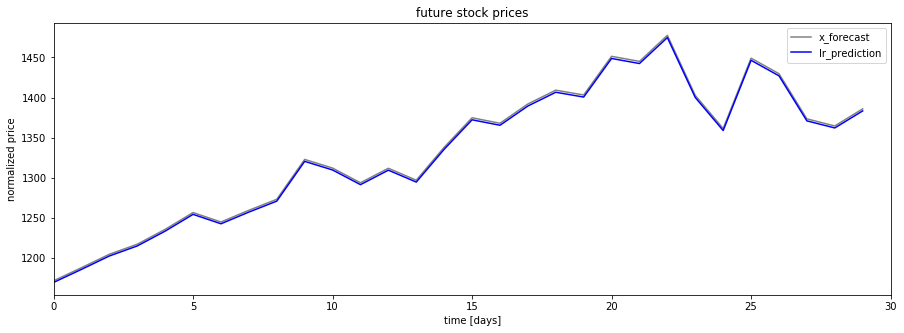

In [62]:
#show the result
plt.figure(figsize=(15, 5));
plt.xlim([0, len(lr_prediction)])
plt.plot(range(len(x_forecast)), x_forecast, 'grey', label = 'x_forecast')
plt.plot(range(len(lr_prediction)), lr_prediction, 'b', label = 'lr_prediction')
plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

Build SVM model

In [23]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3,gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
svr_linear = SVR(kernel='linear') 
svr_linear.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm svr_rbf confidence: ", svm_confidence)
svm_confidence = svr_linear.score(x_test, y_test)
print("svm svr_linear confidence: ", svm_confidence)

svm svr_rbf confidence:  0.9471903399112754
svm svr_linear confidence:  0.9987111286699446


Prediction with SVM

In [26]:
svm_prediction = svr_rbf.predict(x_forecast)
svm_score = mean_squared_error(x_forecast, svm_prediction)
print('SVM rbf MSE : %.3f' % svm_score)
svm_prediction_linear = svr_linear.predict(x_forecast)
svm_score_linear = mean_squared_error(x_forecast, svm_prediction_linear)
print('SVM linear MSE: %.3f' % svm_score_linear)
# Print support vector regressor model predictions for the next '30' days

SVM rbf MSE : 24670.900
SVM linear MSE: 7.027


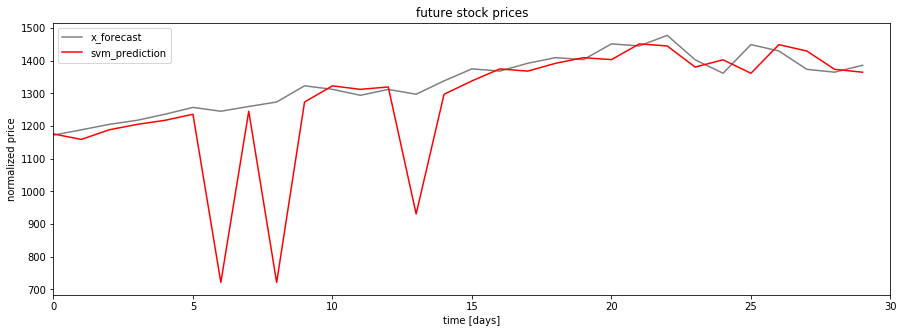

In [75]:
#show the result
plt.figure(figsize=(15, 5));
plt.xlim([0, len(svm_prediction)])
plt.plot(range(len(x_forecast)), x_forecast, 'grey', label = 'x_forecast')
plt.plot(range(len(svm_prediction)), svm_prediction, 'r', label = 'svm_prediction')
#plt.plot(range(len(lr_prediction)), lr_prediction, 'b', label = 'lr_prediction')
plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

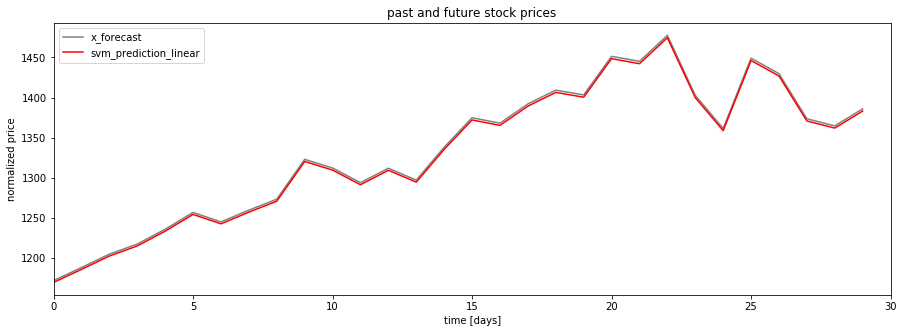

In [28]:
#show the result
plt.figure(figsize=(15, 5));
plt.xlim([0, len(svm_prediction_linear)])
plt.plot(range(len(x_forecast)), x_forecast, 'grey', label = 'x_forecast')
plt.plot(range(len(svm_prediction_linear)), svm_prediction_linear, 'r', label = 'svm_prediction_linear')
#plt.plot(range(len(lr_prediction)), lr_prediction, 'b', label = 'lr_prediction')
plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

Auto Regression

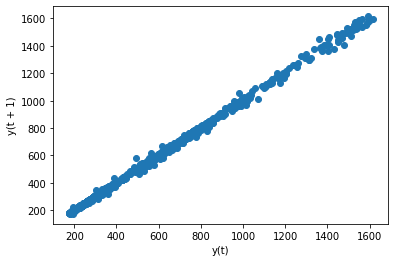

In [63]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
data=df[['Open']]
lag_plot(data)
plt.show()

In [64]:
data['OpenTmr']=data['Open'].shift(-1)
data=data[:-1]
forecast=data[-30:]
data=data[:-30]
#print(x_forecast)

C:\Users\ether\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


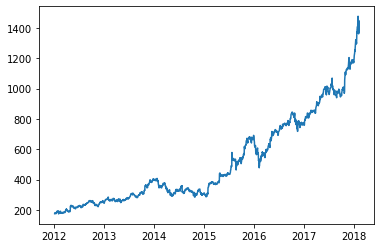

In [65]:
plt.plot(data['Open'])
plt.show()

In [31]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error

# split into train and test sets
y = np.array(data['OpenTmr'])
X = np.array(data['Open'])

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test.shape)
y_forecast=np.array(forecast['OpenTmr'])
x_forecast=np.array(forecast['Open'])

(307,)


use persistence model to check the performance of the stock

Train MSE: 104.167
Test MSE: 108.718
forecast MSE: 626.743


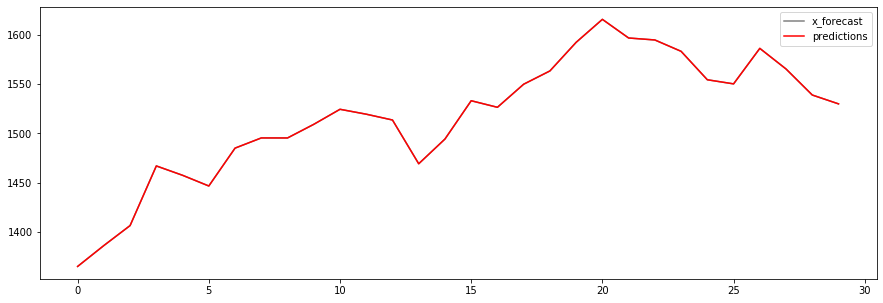

In [32]:
# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in x_train:
    yhat = model_persistence(x)
    predictions.append(yhat)
train_score = mean_squared_error(y_train, predictions)
print('Train MSE: %.3f' % train_score)
sublen=len(predictions)

for x in x_test:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(y_test, predictions[sublen:])
print('Test MSE: %.3f' % test_score)
sublen=len(predictions)

for x in x_forecast:
    yhat = model_persistence(x)
    predictions.append(yhat)
forecast_score = mean_squared_error(y_forecast, predictions[sublen:])
print('forecast MSE: %.3f' % forecast_score)

# plot predictions vs expected
plt.figure(figsize=(15, 5));
plt.plot(range(len(x_forecast)), x_forecast, 'grey', label = 'x_forecast')
plt.plot(range(len(x_forecast)), predictions[sublen:], 'r', label = 'predictions')
plt.legend(loc='best');

find if bootstrap aggregating based on origin formula will predict better

In [70]:
import scipy.stats as ss
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [71]:
#use 3 days' data to predict
dataAG= df
dataAG['CloseYest'] = df['Close'].shift(-1)
dataAG['OpenTmr'] = df['Open'].shift(-1)
dataAG['Close2dayBefore'] = df['Close'].shift(-2)
dataAG = dataAG.dropna(0)
dataAG.tail()

,Open,High,Low,Close,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,OpenTomorrow,Open2d,CloseYest,OpenTmr,Close2dayBefore
Date,,,,,,,,,,,,,,,
2018-03-19,1554.53,1561.66,1525.35,1544.93,6376619.0,1554.53,1561.66,1525.35,1544.93,6376619.0,1550.34,1586.45,1586.51,1550.34,1581.86
2018-03-20,1550.34,1587.00,1545.41,1586.51,4507049.0,1550.34,1587.00,1545.41,1586.51,4507049.0,1586.45,1565.47,1581.86,1586.45,1544.10
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,1586.45,1590.00,1563.17,1581.86,4667291.0,1565.47,1539.01,1544.10,1565.47,1495.56
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,1565.47,1573.85,1542.40,1544.10,6177737.0,1539.01,1530.00,1495.56,1539.01,1555.86
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,1539.01,1549.02,1495.36,1495.56,7843966.0,1530.00,1572.40,1555.86,1530.00,1497.05


In [72]:
def AR():
    N = dataAG.shape[0] # total num days
    num_boot = 1# total num bootstrap
    T= 250 # start day
    window = 200 # training period window
    Y =dataAG['OpenTmr'][-(N-(T+1)):].values
    X = dataAG[['Close','CloseYest','Close2dayBefore']][-(N-(T+1)):].values
    T = X.shape[0]
#     print('T is: ')
#     print(T)
    X = np.column_stack([np.ones((T,1)),X])
    N = X.shape
    invXX = np.linalg.inv(X.transpose()@X)
    
    beta_hat = invXX@X.transpose()@Y
    #print(beta_hat.shape)
    y_hat = X@beta_hat+beta_hat[0]
    
    'Residuals from OLS'
    residuals = Y - y_hat
    'Variance of Residuals'
    sigma2 = (1/T)*residuals.transpose()@residuals
    'standard deviation of Y or residuals'
    sigma = np.sqrt(sigma2)
    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (sigma2)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])

    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat

    p_val = 1-ss.norm.cdf(t_stat)
    rmse_ar1 = np.sqrt(np.mean((Y- y_hat)**2))
    return y_hat,rmse_ar1

In [73]:
import scipy.stats as ss
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
y,rmse=AR()
print("AR MSE: ",rmse)
print(y)
print(len(y))

AR MSE:  6.369567526060644
[ 258.30314887  262.48141168  267.14292548 ... 1568.10752162 1526.20500968
 1521.83897088]
1313


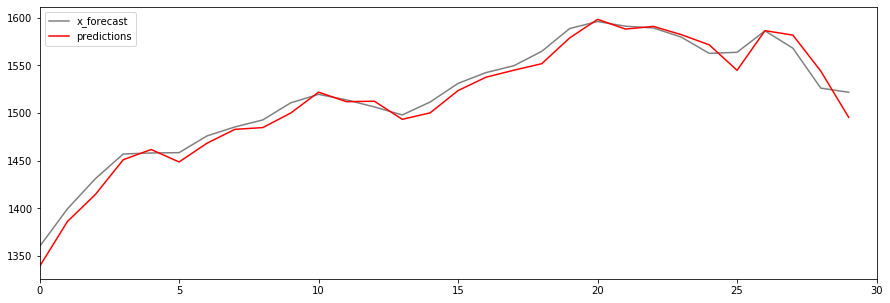

In [74]:
plt.figure(figsize=(15, 5));
plt.xlim([0, 30])
plt.plot(range(30), y[-30:], 'grey', label = 'x_forecast')
plt.plot(range(30), dataAG['Close'][-30:], 'r', label = 'predictions')
plt.legend(loc='best');